In [1]:
import os
import sys

In [2]:
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)
    
from homecredit.data import HomeCredit
from homecredit.preparation import Preparation
from homecredit.cleaner import Cleaning
from homecredit.exploration import Exploration
from homecredit.model import Modeling

from homecredit.encoder import Encoder

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import pickle

# HomeCredit()

In [4]:
data = HomeCredit().get_data()

In [5]:
data.keys()

dict_keys(['test', 'train'])

In [6]:
data['train'].shape

(307511, 122)

In [7]:
data_home = HomeCredit().get_data()['train']
data_home.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data_home.shape

(307511, 122)

In [9]:
data_home['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [10]:
max(data_home['OWN_CAR_AGE'])

nan

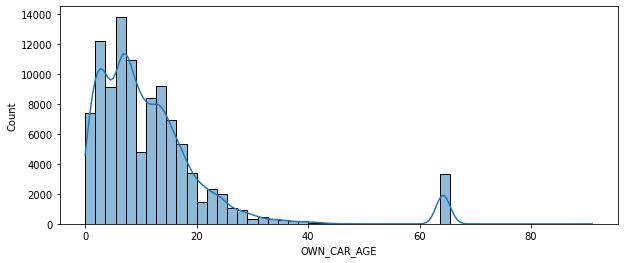

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 4))
sns.histplot(data_home['OWN_CAR_AGE'], kde=True, bins= 50);

In [12]:
data_home = data_home[data_home['CODE_GENDER'] != 'XNA'] # with gender = XNA
data_home = data_home[data_home['NAME_FAMILY_STATUS'] != 'Unknown'] # 'Unknown' status
# Remove entries with DAYS_EMPLOYED > 200_000
data_home = data_home[data_home['DAYS_EMPLOYED'] < 200_000]
data_home = data_home[data_home['AMT_ANNUITY'] < 150_000]
data_home = data_home[data_home['AMT_GOODS_PRICE'] < 2.5* 10**6]  

data_home['FLAG_OWN_CAR'].value_counts()

N    157417
Y     94337
Name: FLAG_OWN_CAR, dtype: int64

In [13]:
data_home = data_home[data_home['OWN_CAR_AGE'] < 80]
data_home['FLAG_OWN_CAR'].value_counts()

Y    94330
Name: FLAG_OWN_CAR, dtype: int64

# Preparation()

In [14]:
prep = Preparation() # data_set = 'train', cols = None
prep.data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
print("shape : ", prep.data.shape)

shape :  (307511, 122)


In [16]:
prep.get_catcols()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

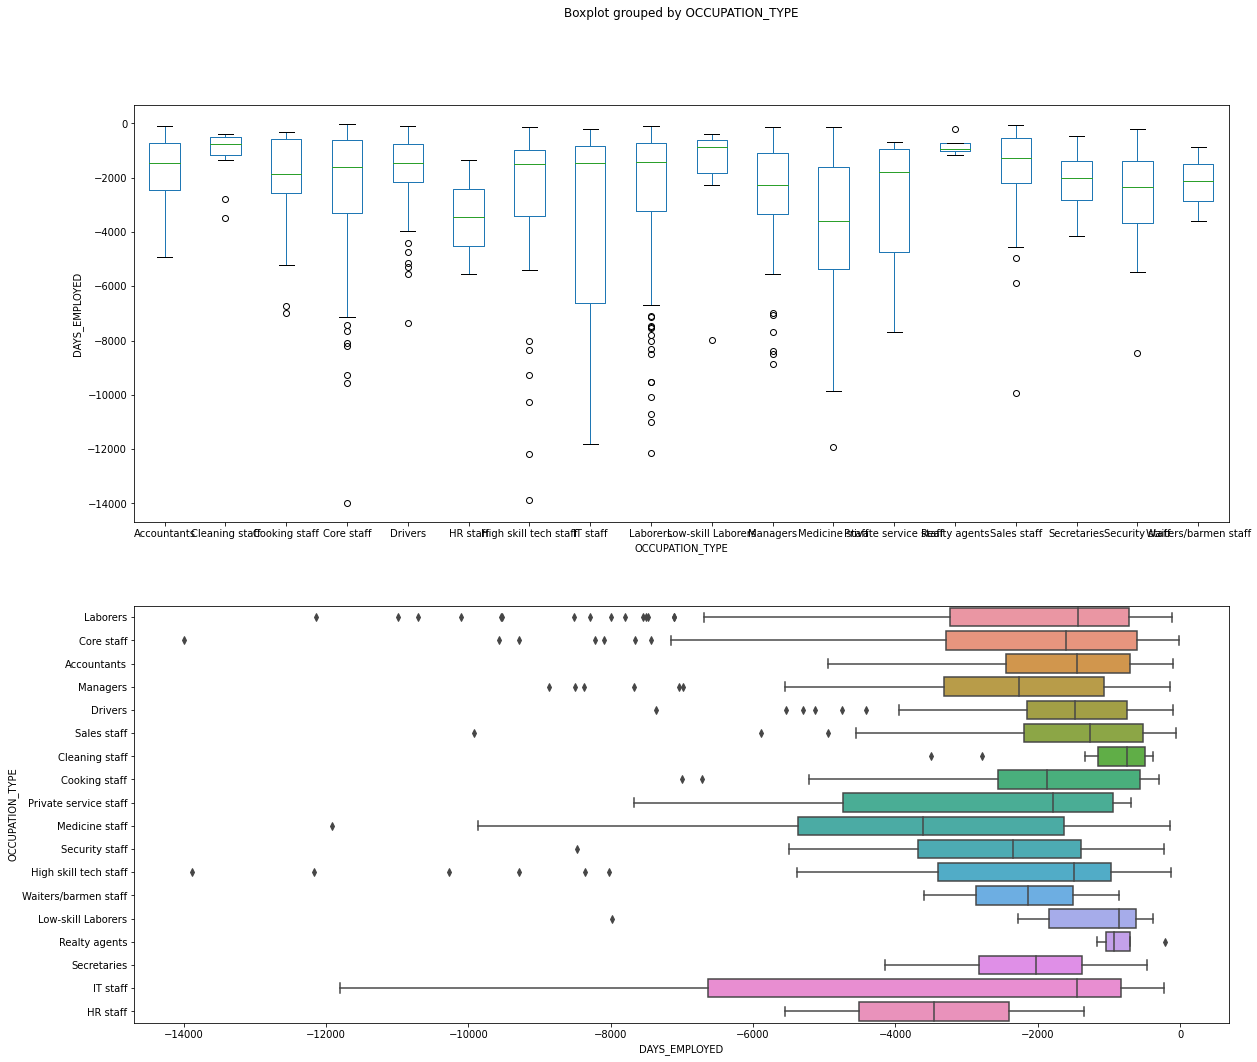

In [17]:
prep.plot_num_cat_cols(numcol= "DAYS_EMPLOYED", catcol="OCCUPATION_TYPE", plot_type=0)

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the s

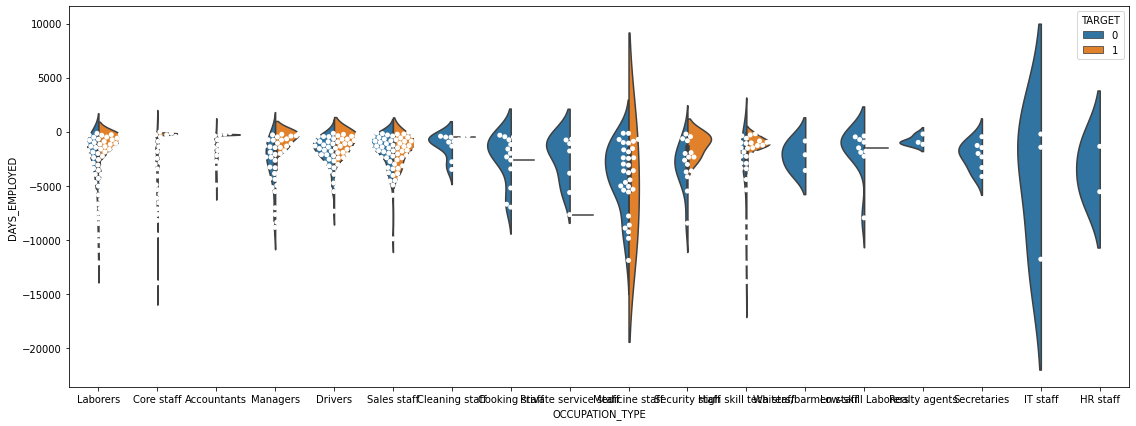

In [18]:
prep.plot_num_cat_cols(numcol= "DAYS_EMPLOYED", catcol="OCCUPATION_TYPE", hue="TARGET")

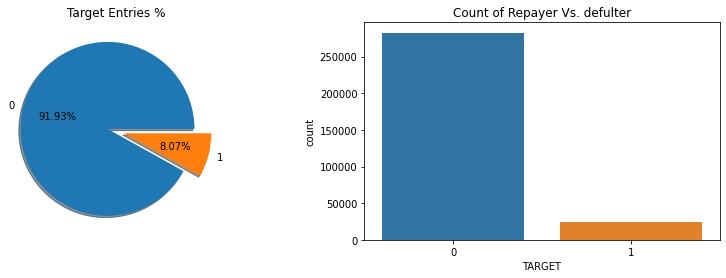

,TARGET
0,0.919271
1,0.080729


In [19]:
prep.targetVar()# targ= "TARGET", other_df=None

## when  data_set = 'test'

In [20]:
prep = Preparation(data_set='test')
prep.data.head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [21]:
prep.__dict__.keys()

dict_keys(['data_set', 'cols', 'data'])

# Cleaning()

In [22]:
cl = Cleaning() # data_set = 'train', cols = None, newdf = None, targ= "TARGET"

In [23]:
cl.__dict__.keys()

dict_keys(['prep', 'cols', 'data_set', 'data', 'newdata'])

In [24]:
cl.data.shape, cl.newdata.shape  # data --> train, newdata --> test

((307511, 122), (48744, 121))

In [25]:
cl.data.head(2)# data --> train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
cl.newdata.head(2) #newdata --> test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [27]:
cl.get_count_missvalues() # data --> train

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
...,...
NAME_HOUSING_TYPE,0
NAME_FAMILY_STATUS,0
NAME_EDUCATION_TYPE,0
NAME_INCOME_TYPE,0


In [28]:
#cl.data.shape : (307511, 11), # data --> train
# cl.newdata.shape  : (48744, 10) # newdata --> test

print("train : ", cl.remove_entries(set_df = 'train').shape)
print("test : ", cl.remove_entries(set_df = 'test').shape)

train :  (251754, 122)
test :  (39431, 121)


In [29]:
print("train : ", cl.remove_missvalues(set_df = 'train').shape)
print("test : ", cl.remove_missvalues(set_df = 'test').shape)

train :  (251754, 122)
test :  (39431, 121)


In [30]:
print("train : ", cl.data.isnull().sum().sum())
print("test : ", cl.newdata.isnull().sum().sum())

train :  9152465
test :  1404419


In [31]:
print("train : ", cl.remove_missvalues(set_df = 'train').isnull().sum().sum())
print("test : ", cl.remove_missvalues(set_df = 'test').isnull().sum().sum())

train :  0
test :  0


/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Number of missing values,Percent
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
...,...,...
EXT_SOURCE_2,660,0.21
AMT_GOODS_PRICE,278,0.09
AMT_ANNUITY,12,0.00
CNT_FAM_MEMBERS,2,0.00


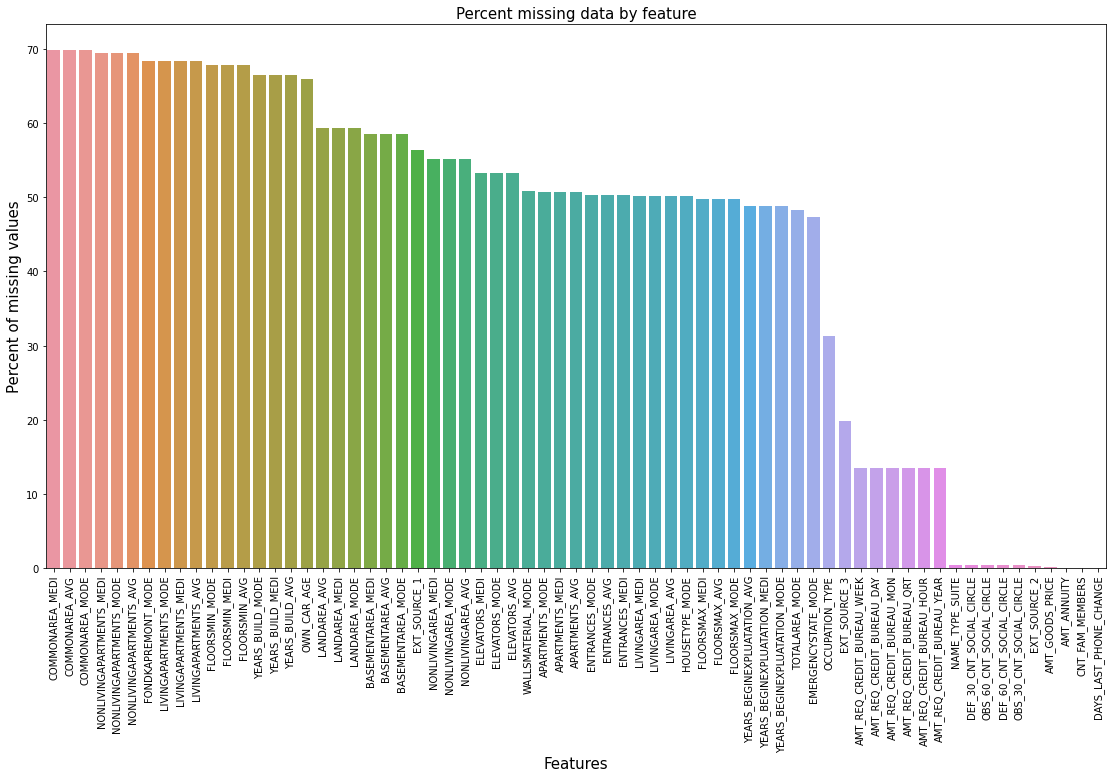

In [32]:
cl.plot_missvalues_table() # na_name=False: # data : train
                                            # if na_names: print the features list  

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',

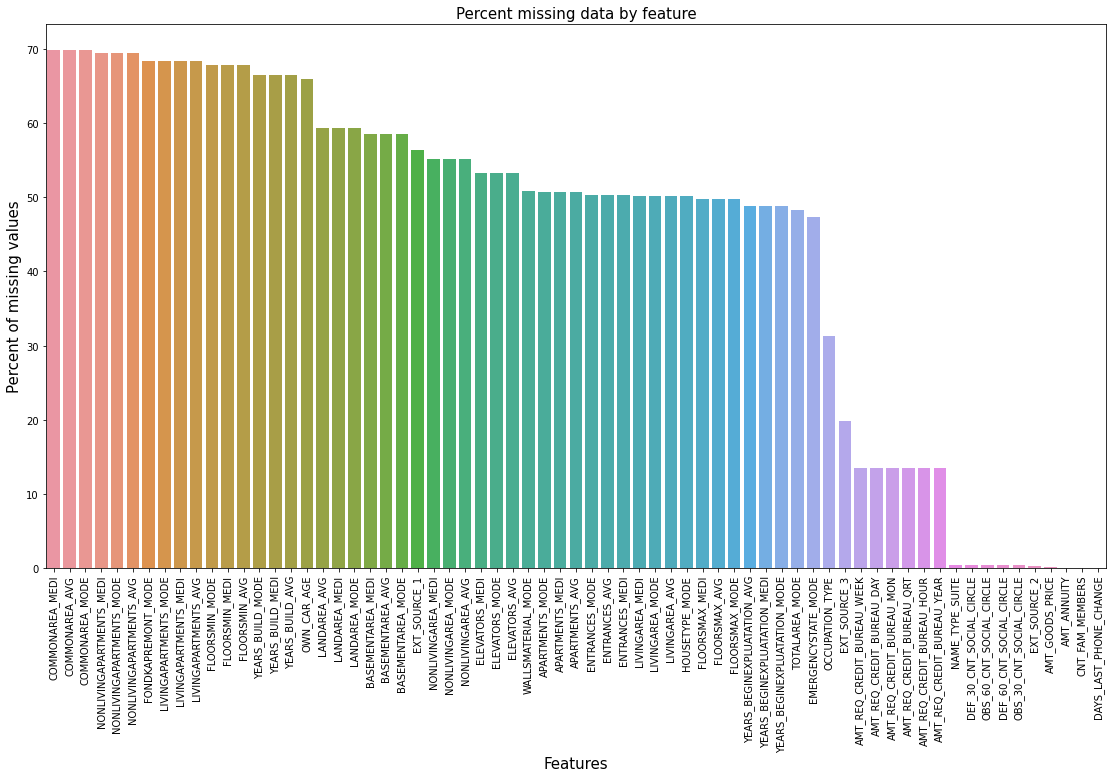

In [33]:
cl.plot_missvalues_table(na_name= True)

## Plots 'Repartition of a feature' : before cleaning

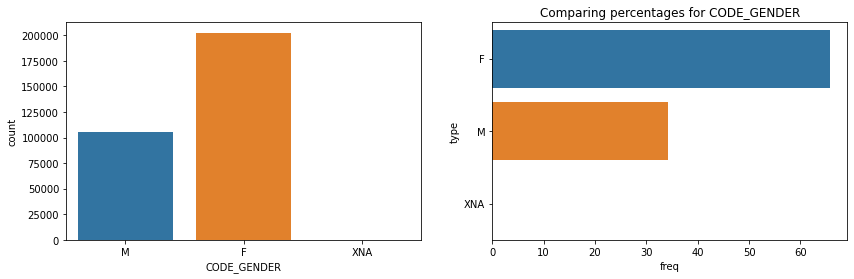

In [34]:
# without cleaning , here  : "CODE_GENDER"
cl.prep.plot_catcols_single(col = "CODE_GENDER")  # prep = Preparation(data_set, cols)

## Plots  'Repartition of a feature' : after cleaning

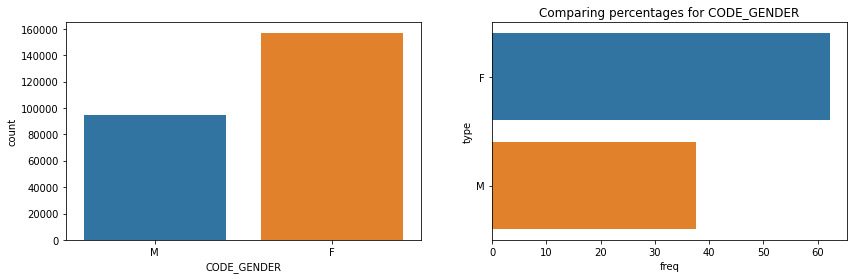

In [35]:
# with cleaning , here  : "CODE_GENDER"
cl.prep.data = cl.remove_missvalues(set_df = 'train')
cl.prep.plot_catcols_single(col = "CODE_GENDER")  # prep = Preparation(data_set, cols)

## Checking out the Cleaning() class when data_set = 'test'

In [4]:
tt = Cleaning(data_set = 'test') # data_set = 'train', cols = None, newdf = None, targ= "TARGET"

In [5]:
tt.__dict__.keys()

dict_keys(['pr', 'prep', 'cols', 'data_set', 'data', 'newdata'])

In [6]:
tt.prep.data_set, tt.data_set

('test', 'test')

In [7]:
tt.data.shape, tt.newdata.shape  # here, both correspond to test data

((48744, 121), (48744, 121))

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(                          Number of missing values  Percent
 COMMONAREA_MODE                              33495    68.72
 COMMONAREA_MEDI                              33495    68.72
 COMMONAREA_AVG                               33495    68.72
 NONLIVINGAPARTMENTS_MEDI                     33347    68.41
 NONLIVINGAPARTMENTS_AVG                      33347    68.41
 ...                                            ...      ...
 OBS_60_CNT_SOCIAL_CIRCLE                        29     0.06
 DEF_30_CNT_SOCIAL_CIRCLE                        29     0.06
 OBS_30_CNT_SOCIAL_CIRCLE                        29     0.06
 AMT_ANNUITY                                     24     0.05
 EXT_SOURCE_2                                     8     0.02
 
 [64 rows x 2 columns],)

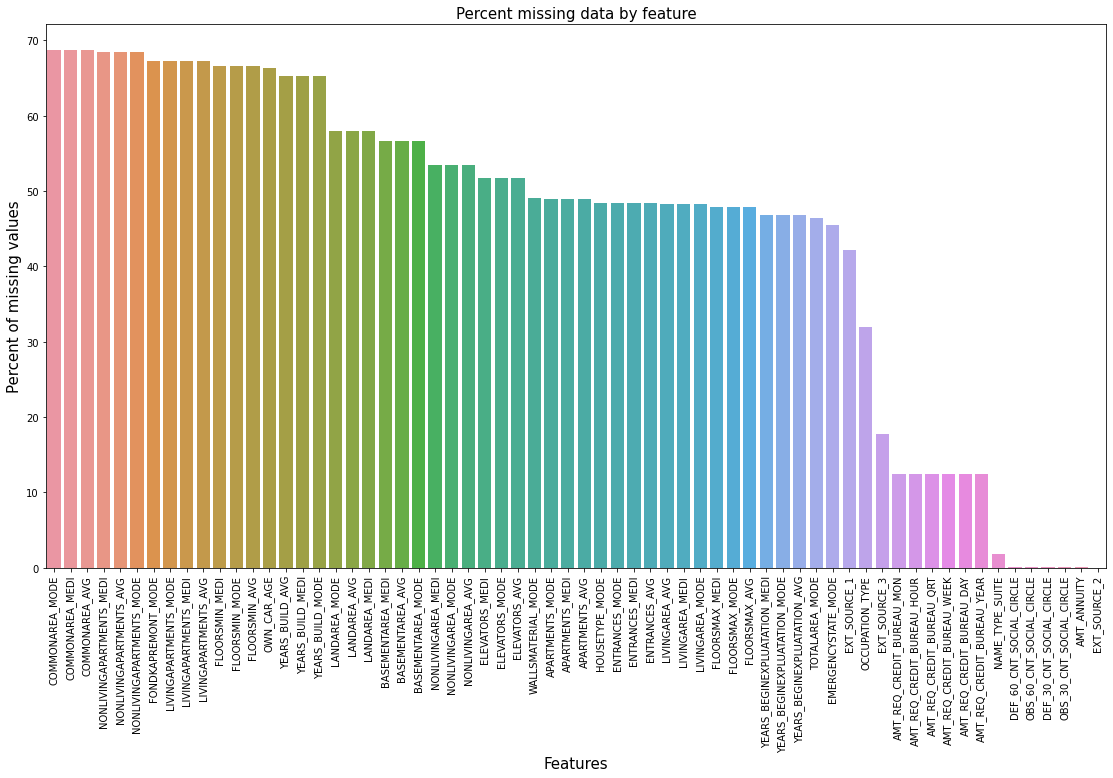

In [8]:
tt.plot_missvalues_table(), # if we want to explore missing values when data : test

In [9]:
# set_df = 'train' or 'test', both data (dataframes) are for data set
# Do not forget that here, tt = Cleaning(data_set = 'test', cols= mask)

print(" test : ", tt.remove_entries(set_df = 'train').shape) 
print("test : ", tt.remove_entries(set_df = 'test').shape)

 test :  (39431, 121)
test :  (39431, 121)


In [10]:
# set_df = 'train' or 'test', both data (dataframes) are for data set
# Do not forget that here, tt = Cleaning(data_set = 'test', cols= mask)

print("test : ", tt.remove_missvalues(set_df = 'train').shape)
print("test : ", tt.remove_missvalues(set_df = 'test').shape)

test :  (39431, 121)
test :  (39431, 121)


In [11]:
# set_df = 'train' or 'test', both data (dataframes) are for data set
# Do not forget that here, tt = Cleaning(data_set = 'test', cols= mask)

print("test : ", tt.data.isnull().sum().sum())
print("test : ", tt.newdata.isnull().sum().sum())

test :  1404419
test :  1404419


In [12]:
# set_df = 'train' or 'test', both data (dataframes) are for data set
# Do not forget that here, tt = Cleaning(data_set = 'test', cols= mask)

print("test : ", tt.remove_missvalues(set_df = 'train').isnull().sum().sum())
print("test : ", tt.remove_missvalues(set_df = 'test').isnull().sum().sum())

test :  0
test :  0


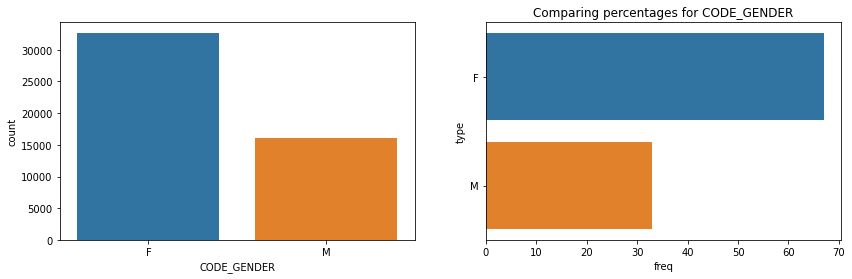

In [13]:
tt.prep.plot_catcols_single(col = "CODE_GENDER") # test data_set

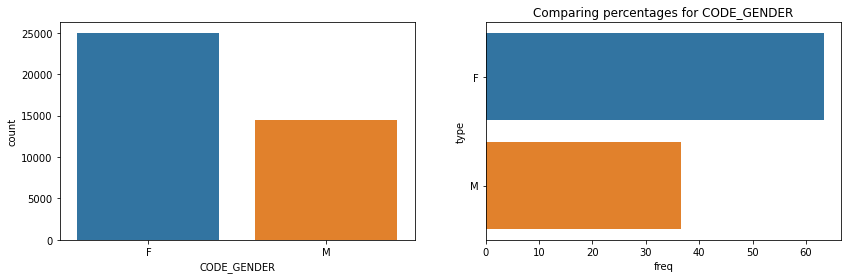

In [14]:
# with cleaning , here  : "CODE_GENDER"
tt.prep.data = tt.remove_missvalues(set_df = 'test')
tt.prep.plot_catcols_single(col = "CODE_GENDER") # test data_set

# Exploration()

In [15]:
ex = Exploration() # data_set = 'train', cols = None

In [16]:
ex.__dict__.keys()

#self.data = self.cl.remove_missvalues() 

dict_keys(['prep', 'cl', 'data', 'cols'])

In [17]:
print(ex.data.shape)
ex.data.head(2)

(251754, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
ex.data.isnull().sum().sum()

0

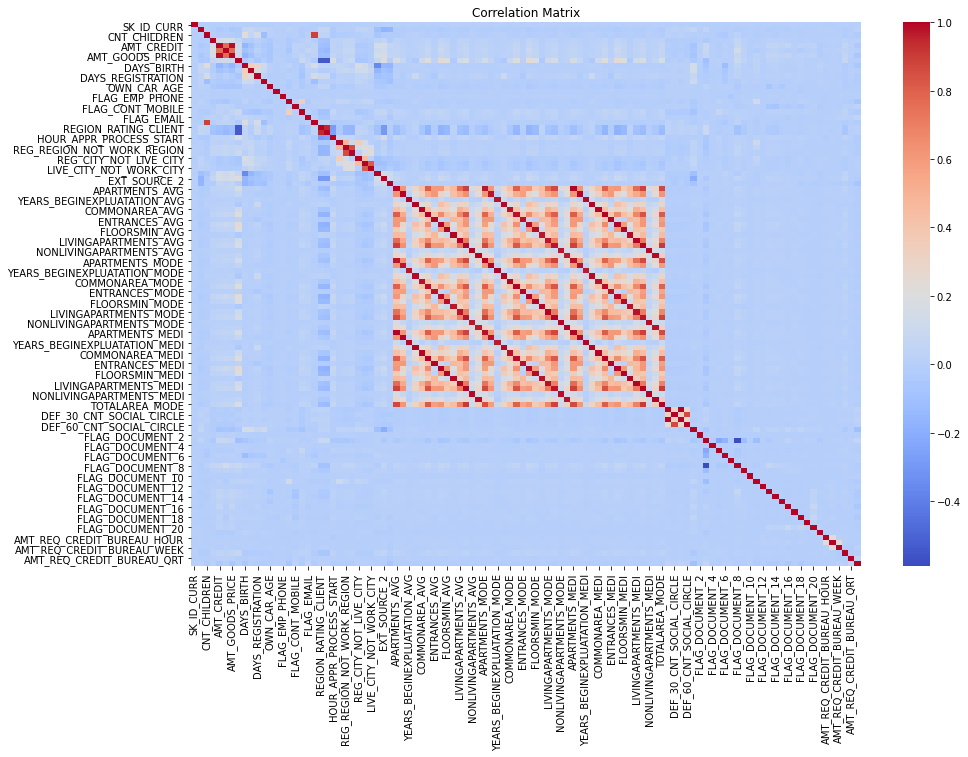

In [19]:
ex.plot_correlation(cbar =True)

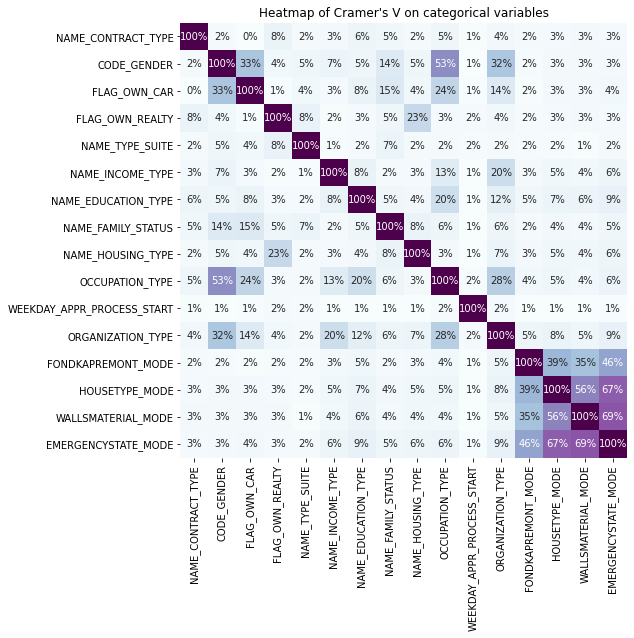

In [20]:
ex.plot_heatmapCramerV()

In [22]:
ex.prep.data_set, ex.cl.prep.data_set, ex.cl.cols, ex.cl.data.shape # ex.cl.data : not cleaned

('train', 'train', None, (307511, 122))

In [23]:
ex.cl.data = ex.data # with cleaning
ex.cl.data.shape

(251754, 122)

In [24]:
# with cleaning
ex.cl.get_count_missvalues()

,0
SK_ID_CURR,0
OBS_30_CNT_SOCIAL_CIRCLE,0
WALLSMATERIAL_MODE,0
TOTALAREA_MODE,0
HOUSETYPE_MODE,0
...,...
LIVE_REGION_NOT_WORK_REGION,0
REG_REGION_NOT_WORK_REGION,0
REG_REGION_NOT_LIVE_REGION,0
HOUR_APPR_PROCESS_START,0


## Checking out the Exploration() class when data_set = 'test'

*if we want to make an exploration analysis on another data*
- Here , for example : application_test.csv since it is the only other data existing in this directory

In [4]:
EX = Exploration(data_set='test')
EX.cl.prep.data_set #= 'test'

'test'

In [5]:
EX.prep.data_set# = 'test'

'test'

In [6]:
EX.cl.get_count_missvalues()

,0
COMMONAREA_AVG,33495
COMMONAREA_MODE,33495
COMMONAREA_MEDI,33495
NONLIVINGAPARTMENTS_AVG,33347
NONLIVINGAPARTMENTS_MODE,33347
...,...
NAME_HOUSING_TYPE,0
NAME_FAMILY_STATUS,0
NAME_EDUCATION_TYPE,0
NAME_INCOME_TYPE,0


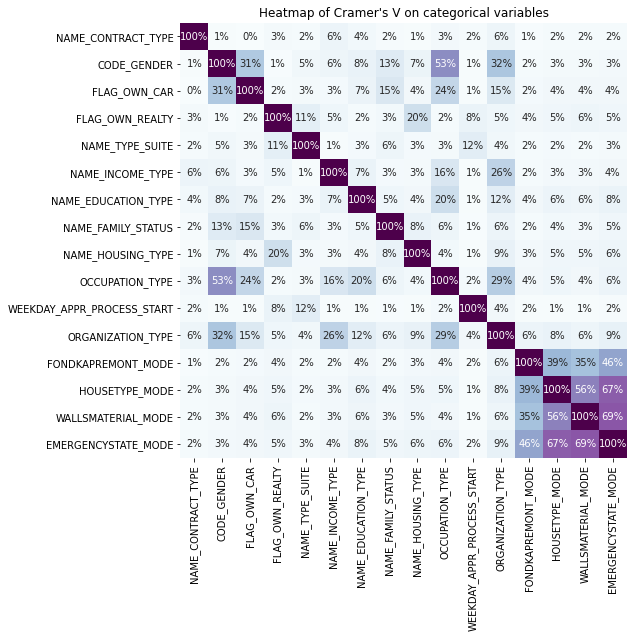

In [7]:
EX.plot_heatmapCramerV()

# Encoder()

In [8]:
en = Encoder() # data_set = 'train', cols = None, newdf = None, targ= "TARGET"

In [9]:
en.__dict__.keys()

dict_keys(['prep', 'cl', 'data', 'tt', 'new_data'])

In [10]:
en.data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
en.new_data.head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [12]:
en.data.shape, en.new_data.shape  # data --> train, new_data --> test

((251754, 122), (39470, 121))

In [13]:
encoded_df = en.execute() # data_topredict=False ---> encoding 'train' data
encoded_df.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,No,Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0


In [14]:
(encoded_df_train, encoded_df_pred) = en.execute(data_topredict=True) # here, we get encoded data for 
                                                            #train & test sets ---> data_topredict:True
encoded_df_train.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,No,Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0


In [15]:
encoded_df_pred.head(2)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,No,Yes
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,0,0,0,0
